In [33]:
import math
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA, FastICA

from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression

In [2]:
#search and store names of all the files in folder in array
def arrayFiles(path):
    folderContent = os.listdir(path)
    fifFiles = []
    for i in folderContent :
        fifFiles.append(path + "/" + i)
    
    return fifFiles

In [3]:
#concatenate path to name of each file and store in array for reading in data
path = '/Volumes/flash64/EpochedEEG'
allFifFiles = arrayFiles(path)
#print(allFifFiles)

In [42]:
classification_score = []

In [4]:
epoch = mne.read_epochs(allFifFiles[0],preload=True)

Reading /Volumes/flash64/EpochedEEG/20131216_1441_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5424 matching events found
Applying baseline correction (mode: mean)
5424 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [5]:
epoch_copy = epoch.copy().crop(0,0.5)


In [6]:
#events = mne.pick_events(epoch.events, exclude=[133, 134])

In [7]:
events = epoch_copy.events
print(events[:,-1])

[131  31 144 ...   1 131 134]


In [8]:
#plotting the data to see it work.
#epoch_copy.plot(n_channels=20)

In [9]:
event_id = epoch_copy.event_id

In [10]:
X = epoch_copy.get_data()
y=epoch_copy.events[:,-1]

XX = X[:,-1] 

#init pca and fit to data
pca = UnsupervisedSpatialFilter(PCA(), average=False)
pca_data = pca.fit_transform(X)


In [17]:
"""
comp_variance = np.cumsum(pca.estimator.explained_variance_ratio_)
plt.plot(comp_variance, linewidth = 4.0, color = 'R')
plt.xlabel('Number of Components', fontsize = 25)
plt.ylabel('Cumulative Variance', fontsize = 25);
plt.xticks(fontsize = 25);
plt.yticks(fontsize = 25);
"""

"\ncomp_variance = np.cumsum(pca.estimator.explained_variance_ratio_)\nplt.plot(comp_variance, linewidth = 4.0, color = 'R')\nplt.xlabel('Number of Components', fontsize = 25)\nplt.ylabel('Cumulative Variance', fontsize = 25);\nplt.xticks(fontsize = 25);\nplt.yticks(fontsize = 25);\n"

In [16]:
logReg = LogisticRegression()

#cross validation
cv = StratifiedKFold(n_splits = 10, shuffle=True)

#fit with cross validation on original data
preds = np.empty(len(y))
scores = []
for train, test, in cv.split(XX, y):
    logReg.fit(XX[train], y[train])
    #preds[test] = logReg.predict(X[test])
    scores.append(logReg.score(XX[test],y[test]))

In [29]:
print("mean classification score", np.mean(scores))

mean classification score 0.3963827612626619


In [44]:
classification_score.append(np.mean(scores))

In [46]:
#print(classification_score)

In [47]:
for i in range(1,5):
    epoch = mne.read_epochs(allFifFiles[i],preload=True)
    epoch_copy = epoch.copy().crop(0,0.5)
    
    X = epoch_copy.get_data()
    y=epoch_copy.events[:,-1]

    XX = X[:,-1] 

    #init pca and fit to data
    pca = UnsupervisedSpatialFilter(PCA(), average=False)
    pca_data = pca.fit_transform(X)
    
    logReg = LogisticRegression()

    #cross validation
    cv = StratifiedKFold(n_splits = 10, shuffle=True)

    #fit with cross validation on original data
    preds = np.empty(len(y))
    scores = []
    for train, test, in cv.split(XX, y):
        logReg.fit(XX[train], y[train])
        #preds[test] = logReg.predict(X[test])
        scores.append(logReg.score(XX[test],y[test]))
        
    print("mean classification score", np.mean(scores))    
    
    classification_score.append(np.mean(scores))

Reading /Volumes/flash64/EpochedEEG/20140205_1114_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5379 matching events found
Applying baseline correction (mode: mean)
5379 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
mean classification score 0.3978004063827708
Reading /Volumes/flash64/EpochedEEG/20140205_1230_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5565 matching events found
Applying baseline correction (mode: mean)
5565 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


mean classification score 0.39551825901704074
Reading /Volumes/flash64/EpochedEEG/20140206_1029_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5384 matching events found
Applying baseline correction (mode: mean)
5384 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
mean classification score 0.38833589143550185
Reading /Volumes/flash64/EpochedEEG/20140206_1151_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5583 matching events found
Applying baseline correction (mode: mean)
5583 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
mean classification score 0.4046065937817448


In [48]:
print(classification_score)

[0.3963827612626619, 0.3978004063827708, 0.39551825901704074, 0.38833589143550185, 0.4046065937817448]


Text(0.5,1,'Logistic Regression')

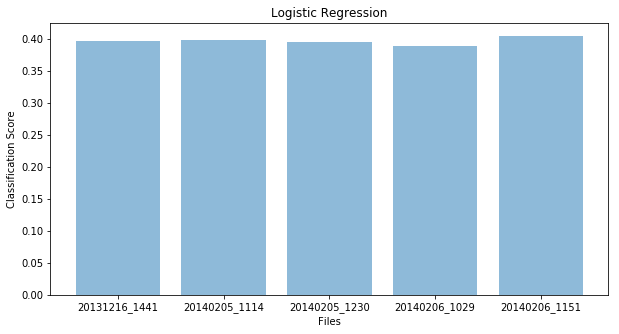

In [59]:
subj = ['20131216_1441','20140205_1114','20140205_1230','20140206_1029','20140206_1151']
pos = np.arange(len(subj))
plt.bar(pos, classification_score, align='center', alpha=0.5)
plt.xticks(pos, subj)
plt.xlabel("Files")
plt.ylabel('Classification Score')
plt.title('Logistic Regression')